In [1]:
#project

In [2]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

pb.pltutils.use_style()

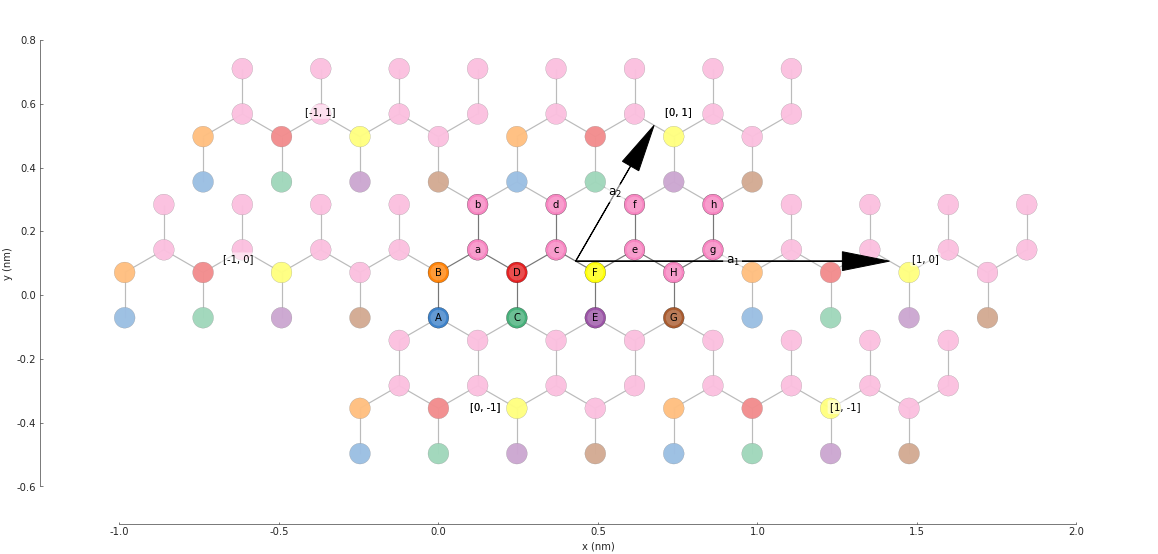

In [3]:
from math import sqrt

#standard armchiar graphene

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[4*a, 0],
                     a2=[a, a * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]),
                        ('C', [a,  -a_cc/2]),
                        ('D', [a,  a_cc/2]),
                        ('E', [2*a,  -a_cc/2]),
                        ('F', [2*a,  a_cc/2]),
                        ('G', [3*a,  -a_cc/2]),
                        ('H', [3*a,  a_cc/2]),
                        
                        ('a', [a/2, a/2 * sqrt(3) -a_cc/2]),
                        ('b', [a/2, a/2 * sqrt(3) +a_cc/2]),
                        ('c', [3*a/2,  a/2 * sqrt(3) -a_cc/2]),
                        ('d', [3*a/2,  a/2 * sqrt(3) +a_cc/2]),
                        ('e', [5*a/2,  a/2 * sqrt(3) -a_cc/2]),
                        ('f', [5*a/2,  a/2 * sqrt(3) +a_cc/2]),
                        ('g', [7*a/2,  a/2 * sqrt(3) -a_cc/2]),
                        ('h', [7*a/2,  a/2 * sqrt(3) +a_cc/2]),#position
                        
                        
                        
                       )
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        ([0,  0], 'C', 'D', t),
        ([0,  0], 'E', 'F', t),
        ([0,  0], 'H', 'G', t),
        ([0,  0], 'a', 'b', t),
        ([0,  0], 'c', 'd', t),
        ([0,  0], 'e', 'f', t),
        ([0,  0], 'h', 'g', t),
        ([0, 0], 'B', 'a', t),
        ([0, 0], 'D', 'a', t),
        ([0, 0], 'D', 'c', t),
        ([0, 0], 'F', 'c', t),
        ([0, 0], 'F', 'e', t),
        ([0, 0], 'H', 'e', t),
        ([0, 0], 'H', 'g', t),
        
        
        # between neighboring cells
        ([0, -1], 'A', 'b', t),
        ([0, -1], 'A', 'd', t),
        ([0, -1], 'C', 'd', t),
        ([0, -1], 'C', 'f', t),
        ([0, -1], 'E', 'f', t),
        ([0, -1], 'E', 'h', t),
        ([0, -1], 'G', 'h', t),
        ([1, -1], 'G', 'b', t),
        ([1, 0], 'g', 'B', t),
        #([-1, 0], 'B', 'g', t),
        #([0, 1], 'G', 'h', t),
        
     
        
    )
    return lat

plt.figure(figsize=(20,10))
lattice = monolayer_graphene()
lattice.plot()
plt.show()

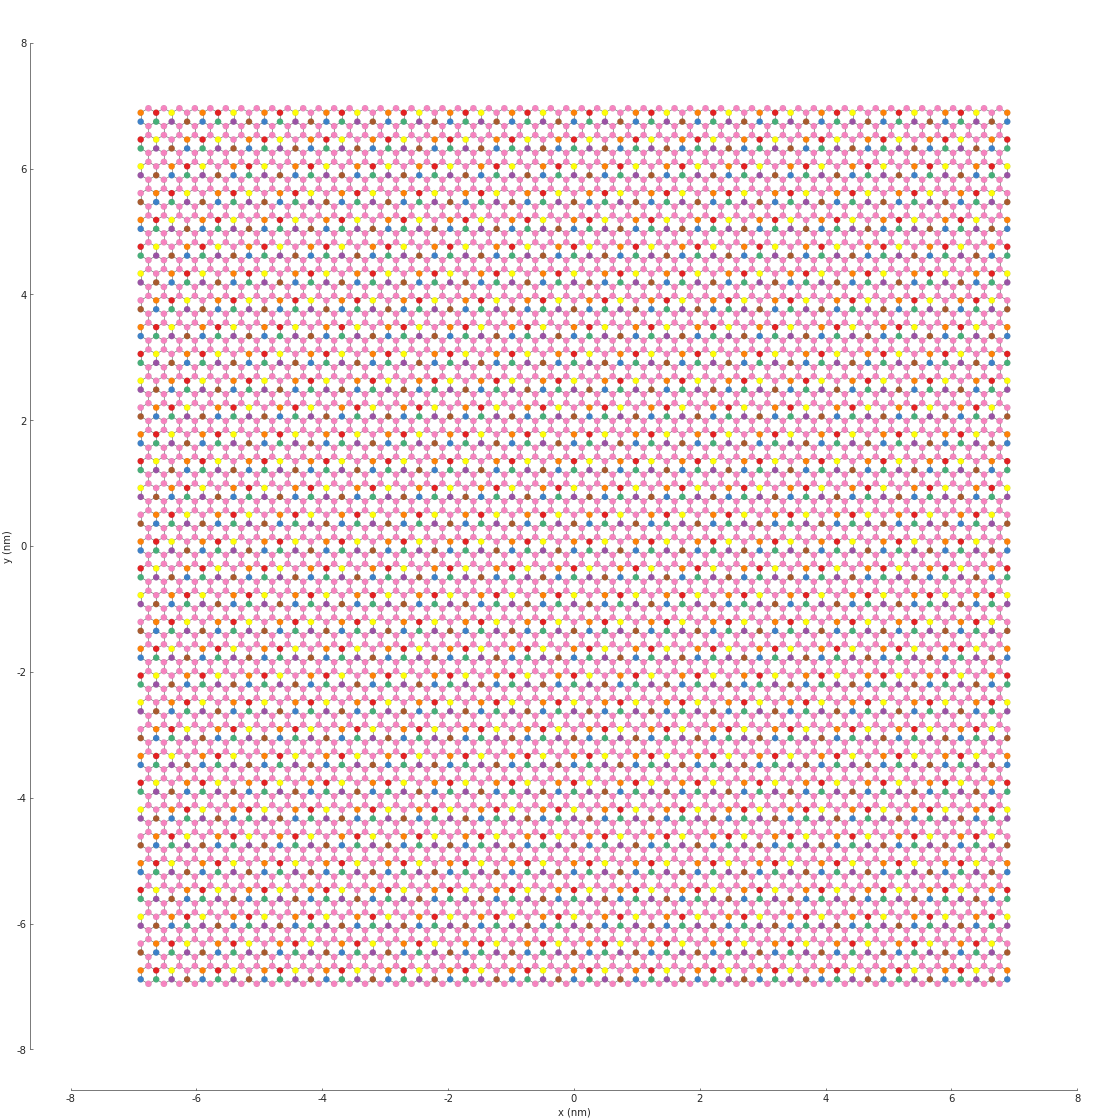

In [4]:
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=10, a2=10),
    pb.rectangle(14),
    #pb.translational_symmetry(a1=20, a2=20)
    )

plt.figure(figsize=[20, 20])
model.plot()

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


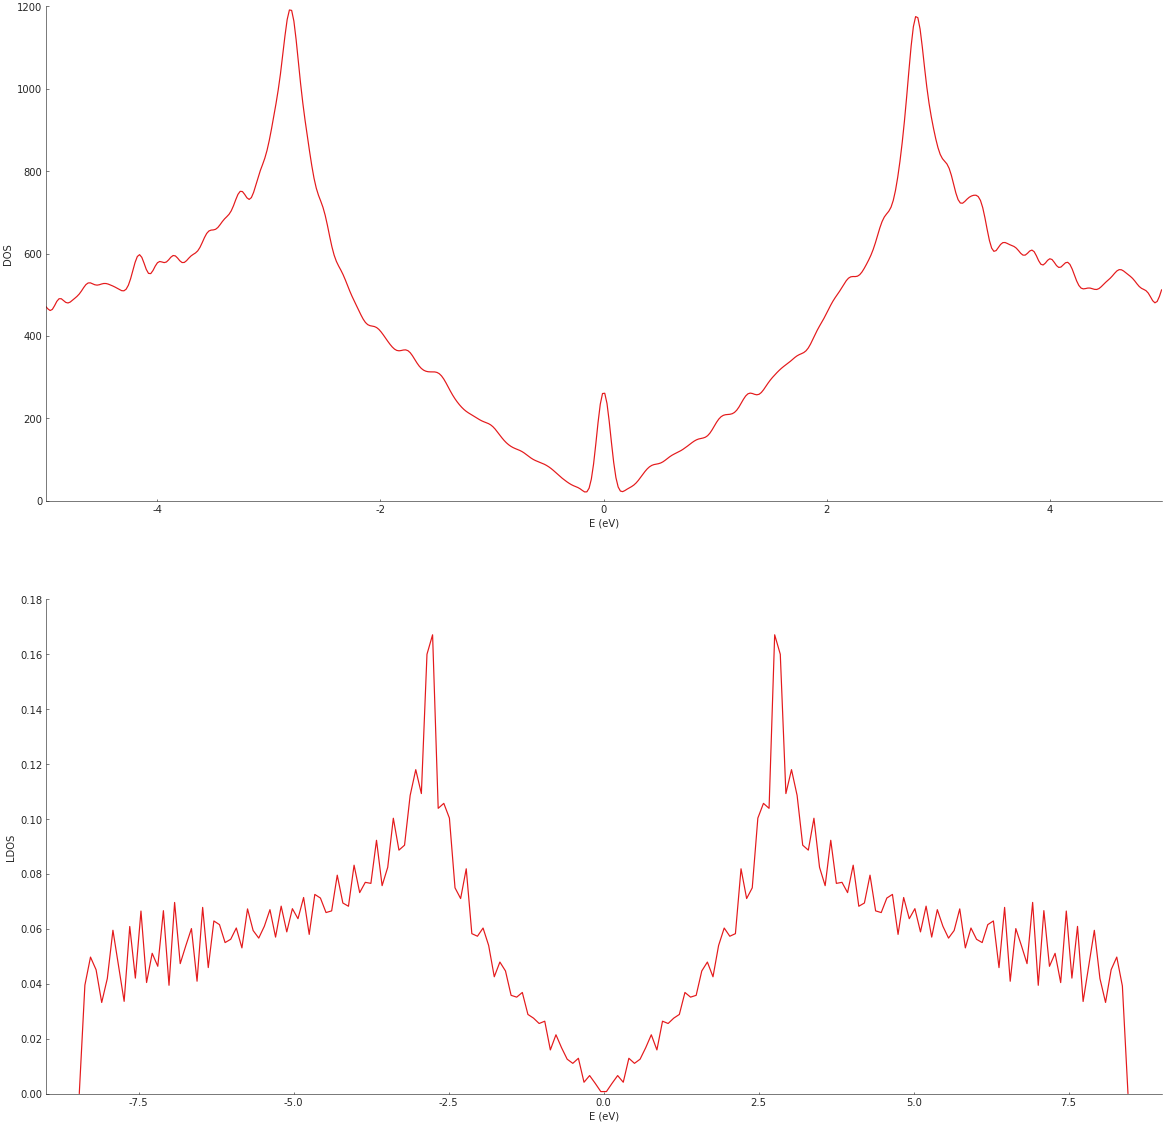

In [5]:
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=10, a2=10),
    pb.rectangle(14),
    #pb.translational_symmetry(a1=20, a2=20)
)
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-5, 5, 500), broadening=0.06, num_random=16)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.figure(figsize=[20,20])
plt.subplot(211)
dos.plot()
plt.subplot(212)
ldos.plot()

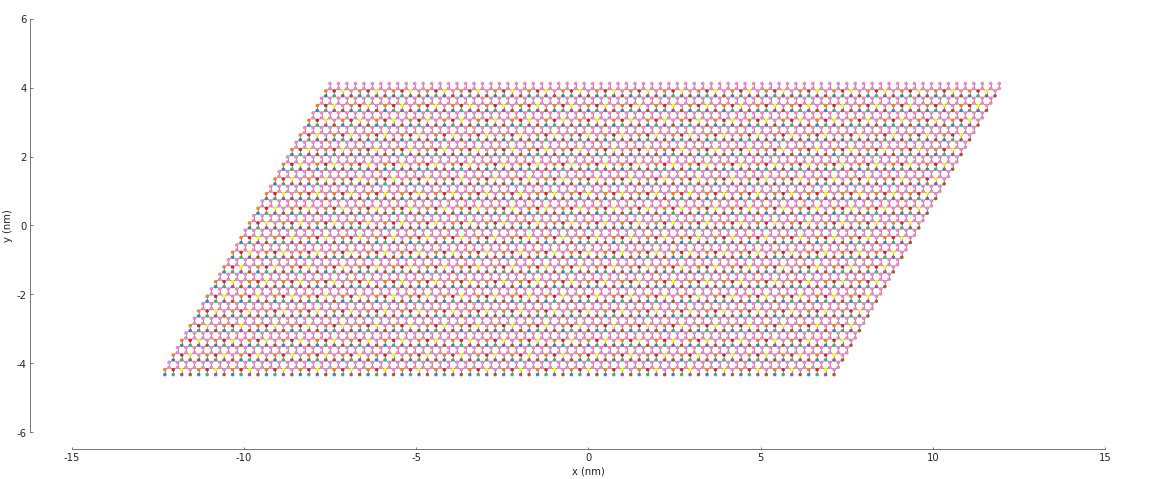

In [6]:
#rhombus graphene
#no strain

model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=20, a2=20),
  #  pb.translational_symmetry(a1=20, a2=20)
    )

plt.figure(figsize=[20, 20])
model.plot()

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


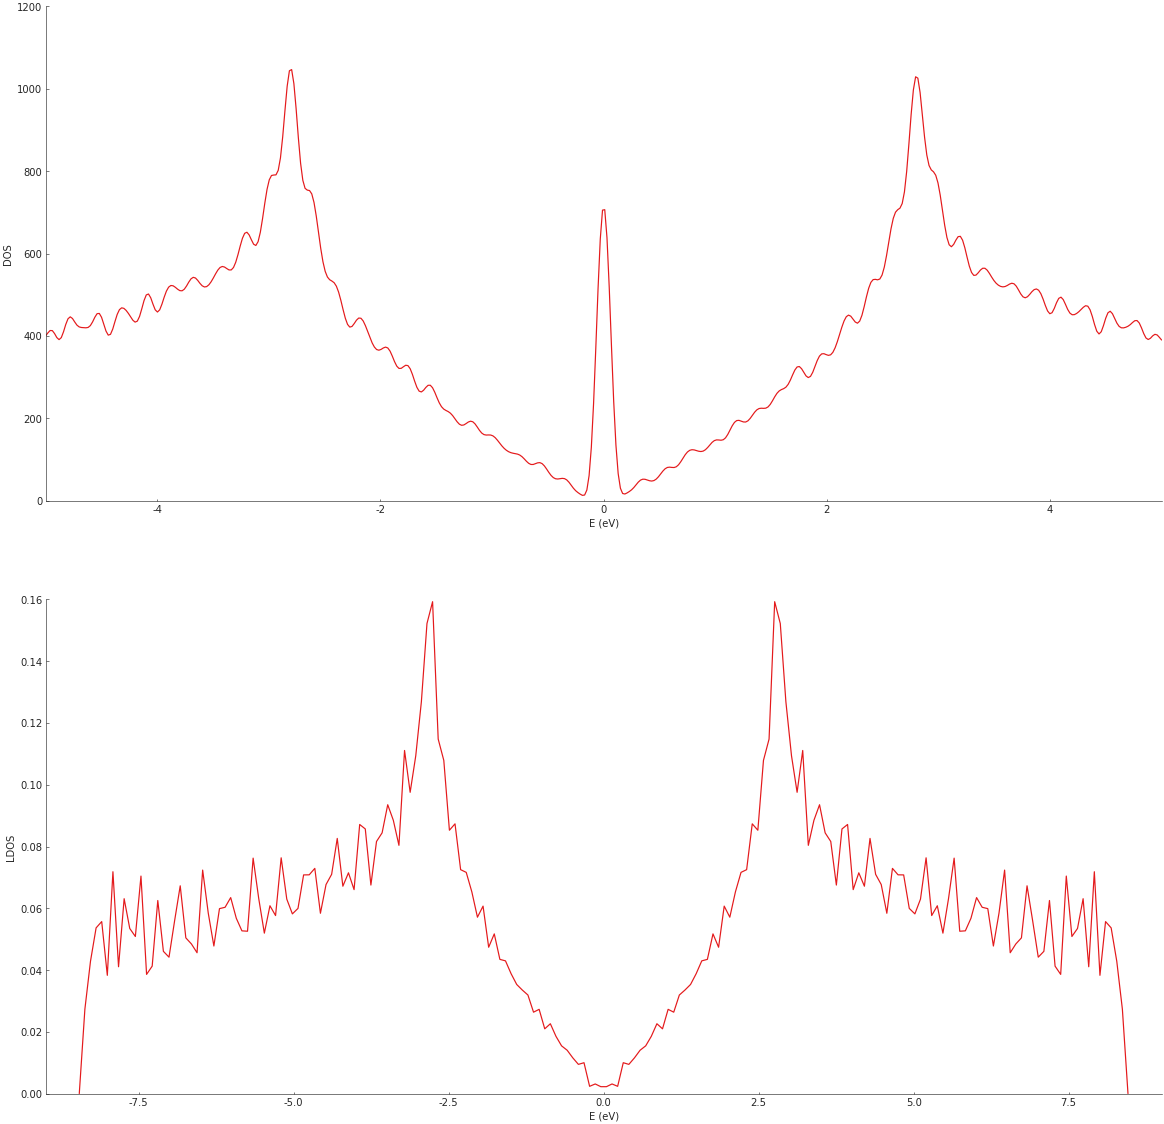

In [7]:
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=20, a2=20),
    pb.translational_symmetry(a1=20, a2=20)
)
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-5, 5, 500), broadening=0.06, num_random=16)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.figure(figsize=[20,20])
plt.subplot(211)
dos.plot()
plt.subplot(212)
ldos.plot()

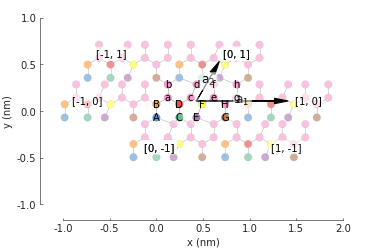

<Figure size 1440x1440 with 0 Axes>

In [8]:
from math import sqrt

def vacancy(position, radius):
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[(x-x0)**2 + (y-y0)**2 < radius**2] = False
        return state
    return modifier


#strain1 on monolayer graphene
def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[4*a, 0],
                     a2=[a, a * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]),
                        ('C', [a,  -a_cc/2]),
                        ('D', [a,  a_cc/2]),
                        ('E', [2*a - a/4,  -a_cc/2]),
                        ('F', [2*a,  a_cc/2]),
                        ('G', [3*a,  -a_cc/2]),
                        ('H', [3*a,  a_cc/2]),
                        
                        ('a', [a/2, a/2 * sqrt(3) -a_cc/2]),
                        ('b', [a/2, a/2 * sqrt(3) +a_cc/2]),
                        ('c', [3*a/2,  a/2 * sqrt(3) -a_cc/2]),
                        ('d', [3*a/2 + a/4,  a/2 * sqrt(3) +a_cc/2]),
                        ('e', [5*a/2,  a/2 * sqrt(3) -a_cc/2]),
                        ('f', [5*a/2,  a/2 * sqrt(3) +a_cc/2]),
                        ('g', [7*a/2,  a/2 * sqrt(3) -a_cc/2]),
                        ('h', [7*a/2,  a/2 * sqrt(3) +a_cc/2]),
                        
                        
                        
                       )
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        ([0,  0], 'C', 'D', t),
        ([0,  0], 'E', 'F', t - t/10),
        ([0,  0], 'H', 'G', t),
        ([0,  0], 'a', 'b', t),
        ([0,  0], 'c', 'd', t - t/10),
        ([0,  0], 'e', 'f', t),
        ([0,  0], 'h', 'g', t),
        ([0, 0], 'B', 'a', t),
        ([0, 0], 'D', 'a', t),
        ([0, 0], 'D', 'c', t),
        ([0, 0], 'F', 'c', t),
        ([0, 0], 'F', 'e', t),
        ([0, 0], 'H', 'e', t),
        ([0, 0], 'H', 'g', t),
        
        
        # between neighboring cells
        ([0, -1], 'A', 'b', t),
        ([0, -1], 'A', 'd', t - t/10),
        ([0, -1], 'C', 'd', t + t/10),
        ([0, -1], 'C', 'f', t),
        ([0, -1], 'E', 'f', t + t/10),
        ([0, -1], 'E', 'h', t - t/10),
        ([0, -1], 'G', 'h', t),
        ([1, -1], 'G', 'b', t),
        ([1, 0], 'g', 'B', t),
        
        
        
    )
    lat.min_neighbors=2
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.figure(figsize=[20,20])
plt.show()

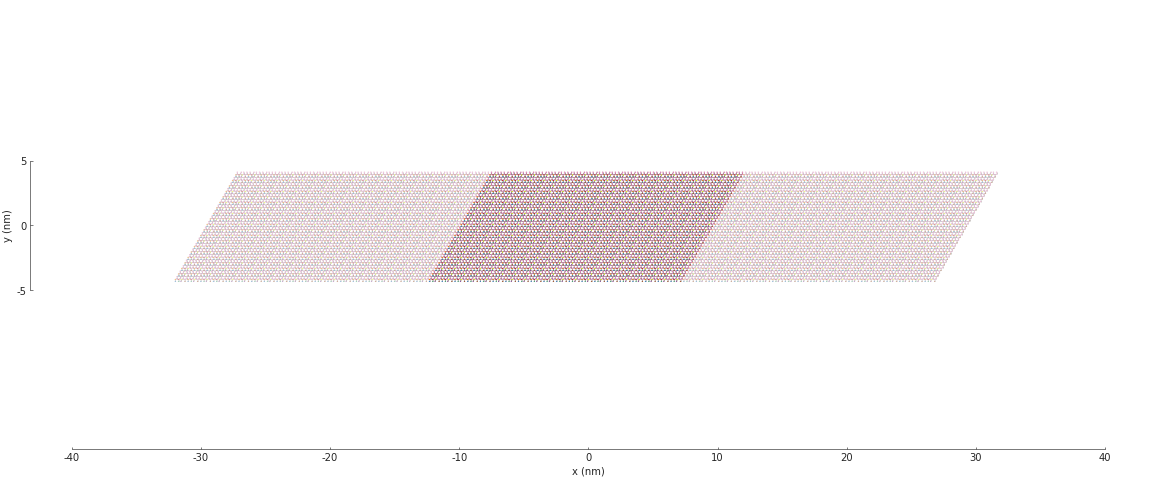

In [9]:
#strain 1
#change two atom's position

model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=20, a2=20),
    pb.translational_symmetry(a1=20, a2=20)
    )

plt.figure(figsize=[20, 20])
model.plot()

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


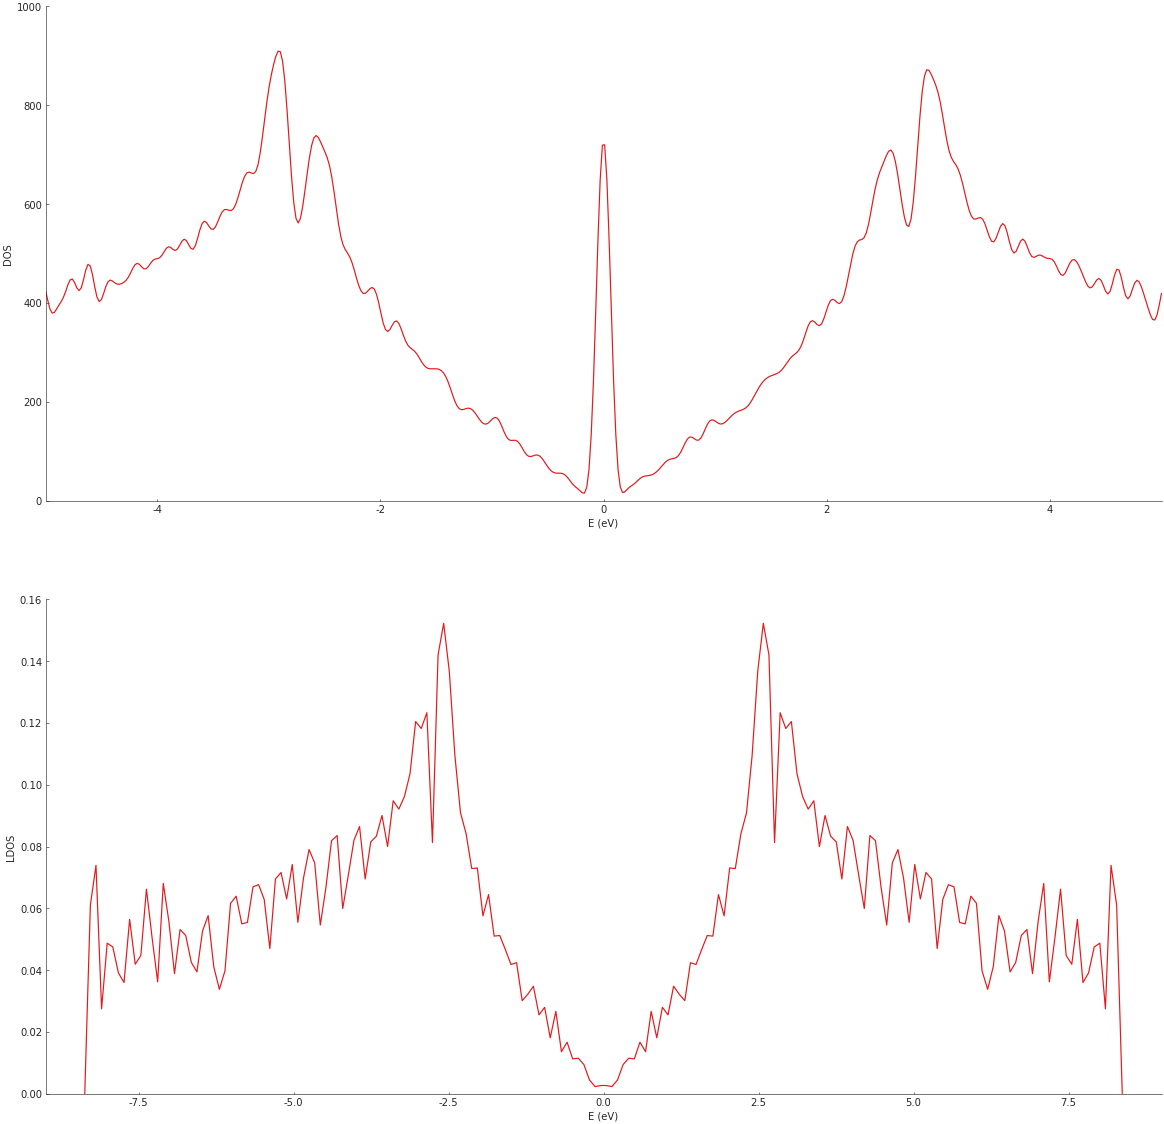

In [10]:
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=20, a2=20),
    pb.translational_symmetry(a1=20, a2=20)
)
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-5, 5, 500), broadening=0.06, num_random=16)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.figure(figsize=[20,20])
plt.subplot(211)
dos.plot()
plt.subplot(212)
ldos.plot()

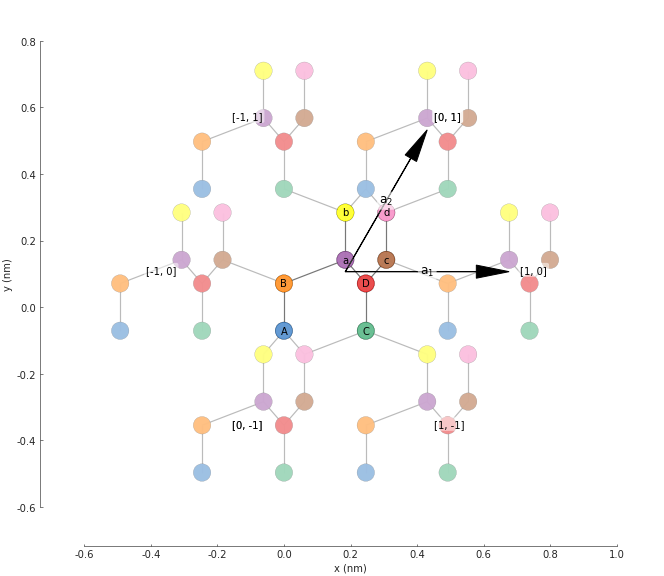

In [11]:
from math import sqrt

#strain2 on monolayer graphene
def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[2*a, 0],
                     a2=[a, a * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]),
                        ('C', [a,  -a_cc/2]),
                        ('D', [a,  a_cc/2]),
                      
                        
                        ('a', [a/2 + a/4 , a/2 * sqrt(3) -a_cc/2]),
                        ('b', [a/2 + a/4 , a/2 * sqrt(3) +a_cc/2]),
                        ('c', [3*a/2 - a/4,  a/2 * sqrt(3) -a_cc/2]),
                        ('d', [3*a/2 - a/4,  a/2 * sqrt(3) +a_cc/2]),
                      
                          )
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        ([0,  0], 'C', 'D', t),
  
        ([0,  0], 'a', 'b', t),
        ([0,  0], 'c', 'd', t),

        ([0, 0], 'B', 'a', t - t/10),
        ([0, 0], 'D', 'a', t + t/10),
        ([0, 0], 'D', 'c', t - t/10),
       
        # between neighboring cells
        ([0, -1], 'A', 'b', t + t/10),
        ([0, -1], 'A', 'd', t + t/10),
        ([0, -1], 'C', 'd', t + t/10),
        ([1, -1], 'C', 'b', t - t/10),
        ([1, 0], 'c', 'B', t),
      
        
       
        )
    
   # lat.min_neighbors(2)
    return lat
plt.figure(figsize=(20,10))
lattice = monolayer_graphene()
lattice.plot()

plt.show()

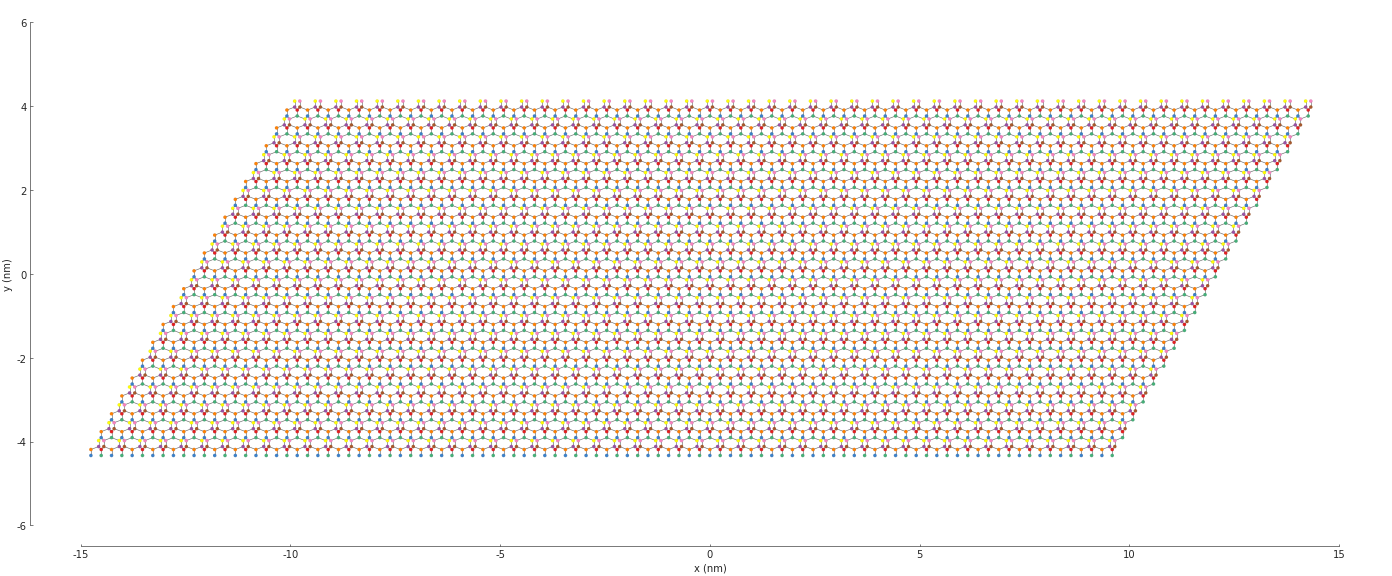

In [12]:
#strain2
#move two atom's position
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20)
)
plt.figure(figsize=(40,10))
model.plot(num_periods=0)

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


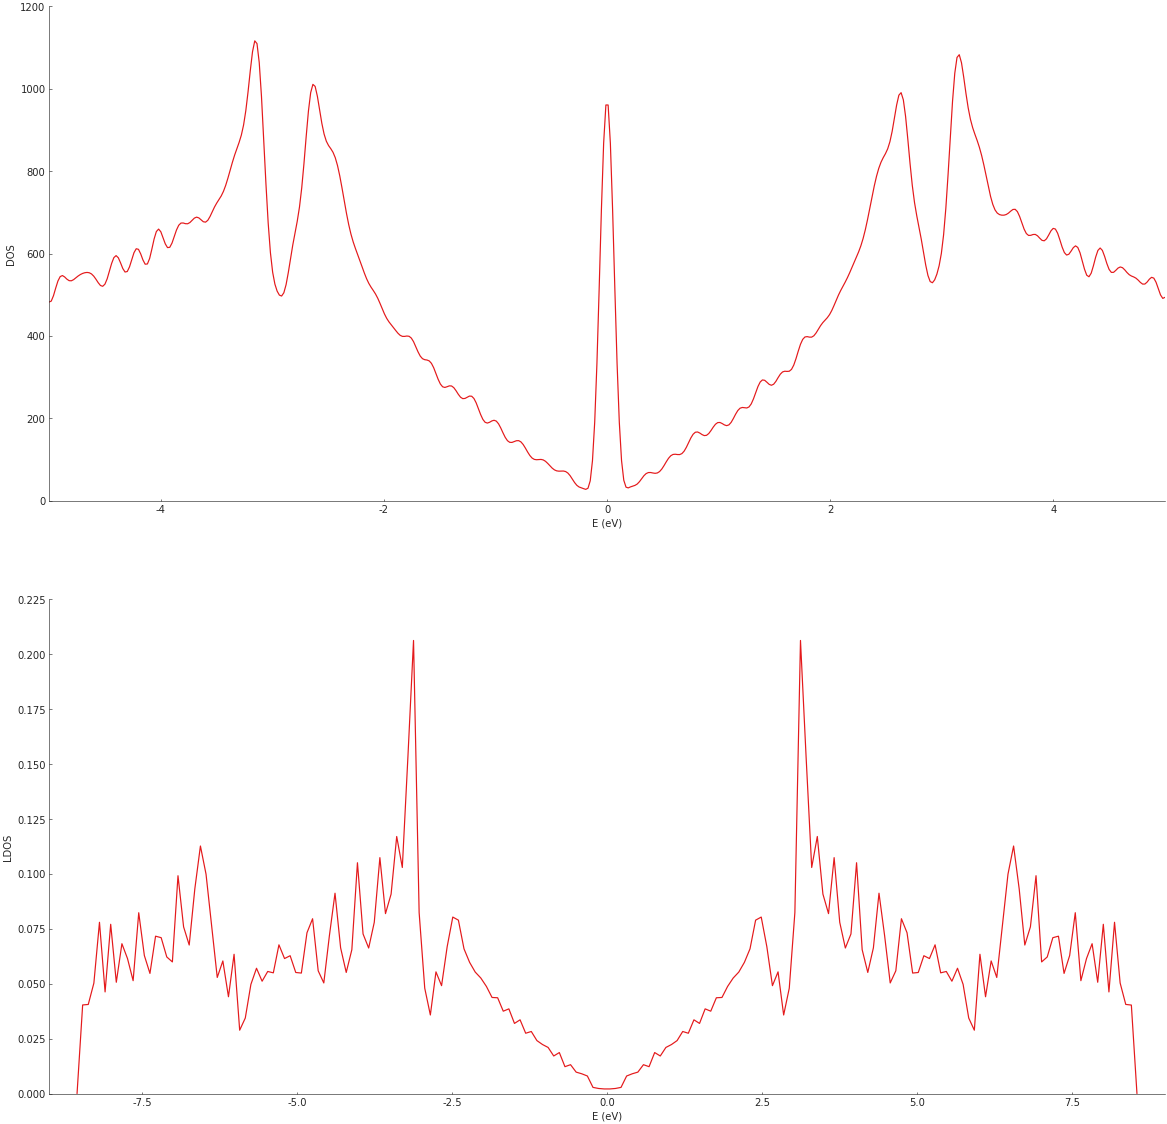

In [13]:
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50,a2=20),
    pb.translational_symmetry(a1=50, a2=20)
)
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-5, 5, 500), broadening=0.06, num_random=16)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.figure(figsize=[20,20])
plt.subplot(211)
dos.plot()
plt.subplot(212)
ldos.plot()

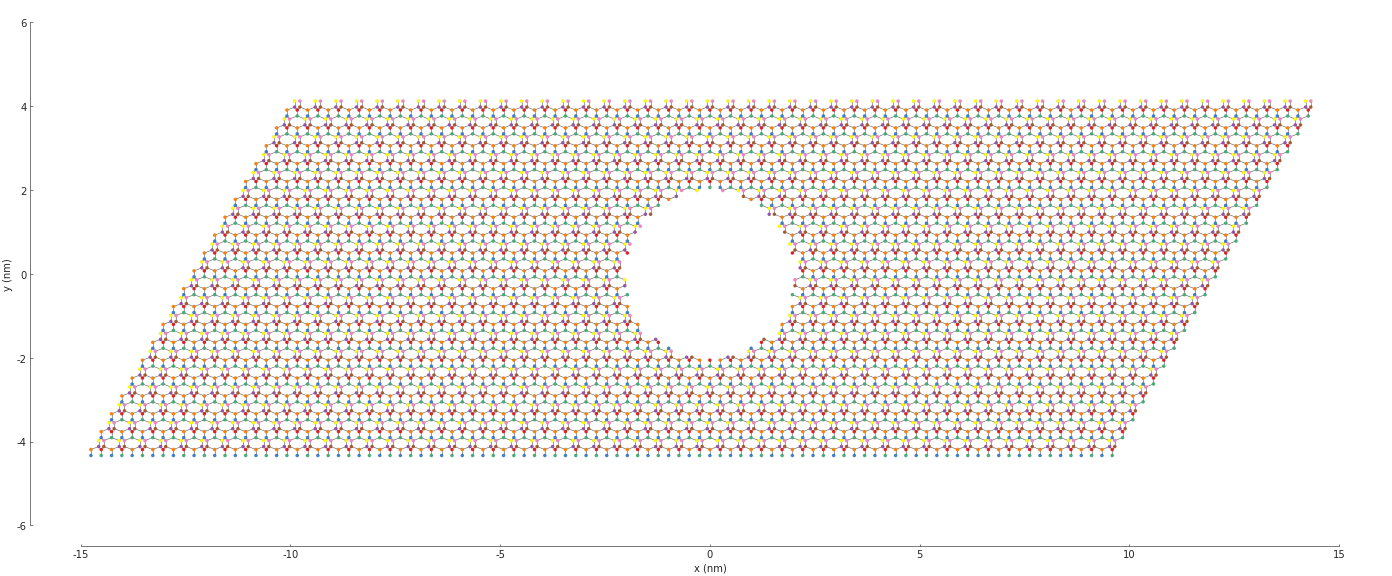

In [14]:
#vacancy to star2 graphene

model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[0, 0], radius=2)
)
plt.figure(figsize=(40,10))
model.plot(num_periods=0)

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


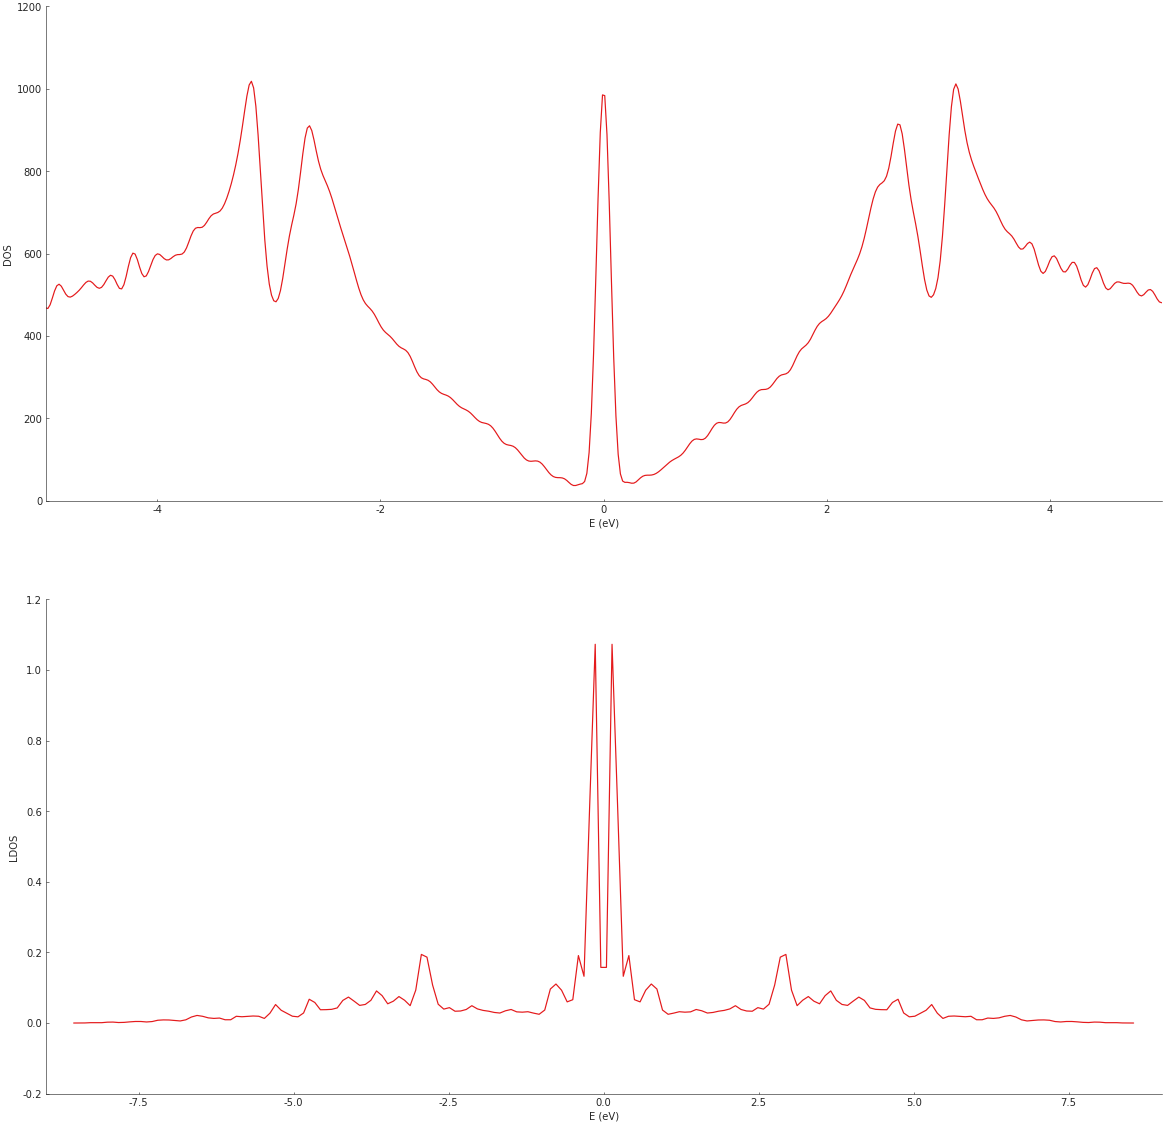

In [15]:
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[0, 0], radius=2)
)
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-5, 5, 500), broadening=0.06, num_random=16)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.figure(figsize=[20,20])
plt.subplot(211)
dos.plot()
plt.subplot(212)
ldos.plot()

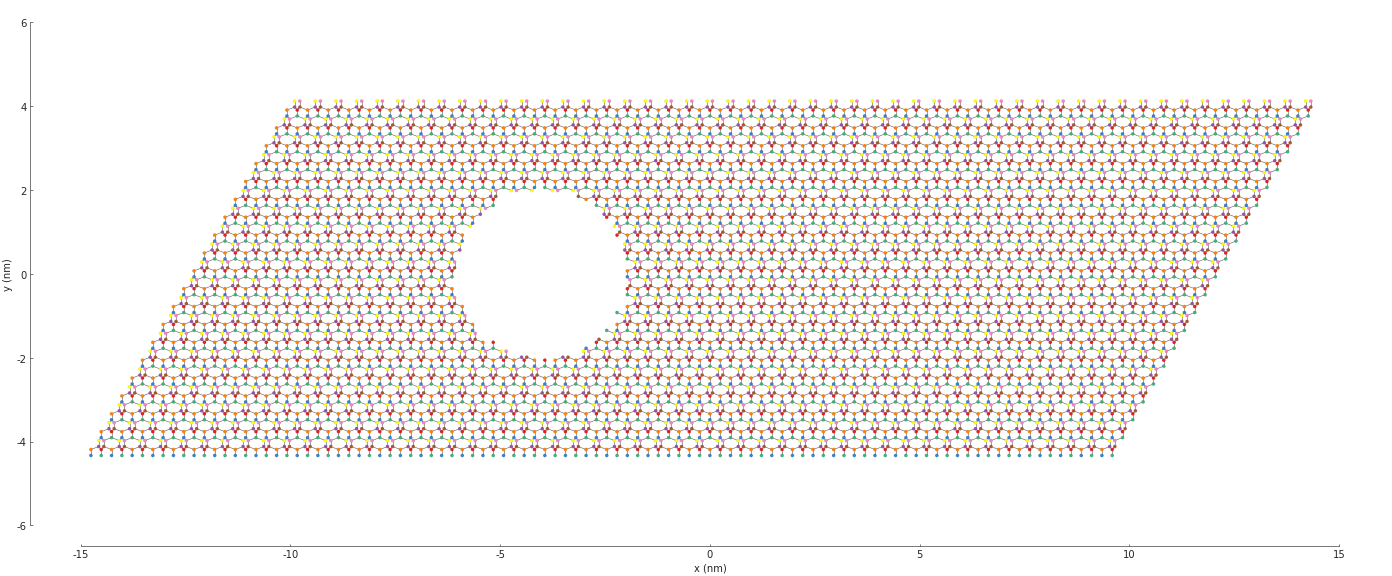

In [16]:
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[-4, 0], radius=2)
)
plt.figure(figsize=(40,10))
model.plot(num_periods=0)

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


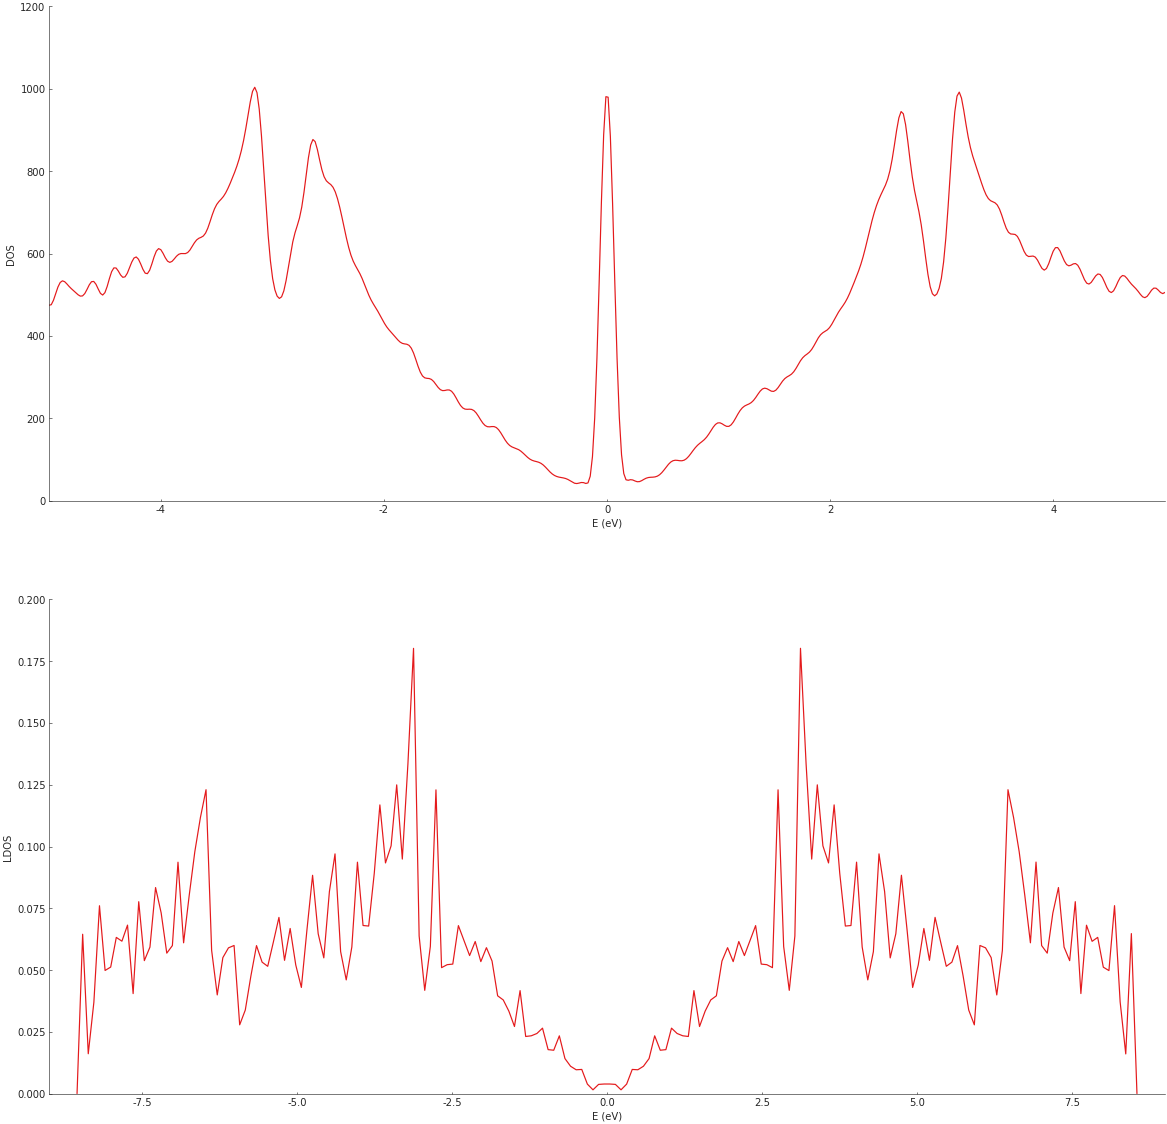

In [17]:
#move -4nm
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[-4, 0], radius=2)
)
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-5, 5, 500), broadening=0.06, num_random=16)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.figure(figsize=[20,20])
plt.subplot(211)
dos.plot()
plt.subplot(212)
ldos.plot()

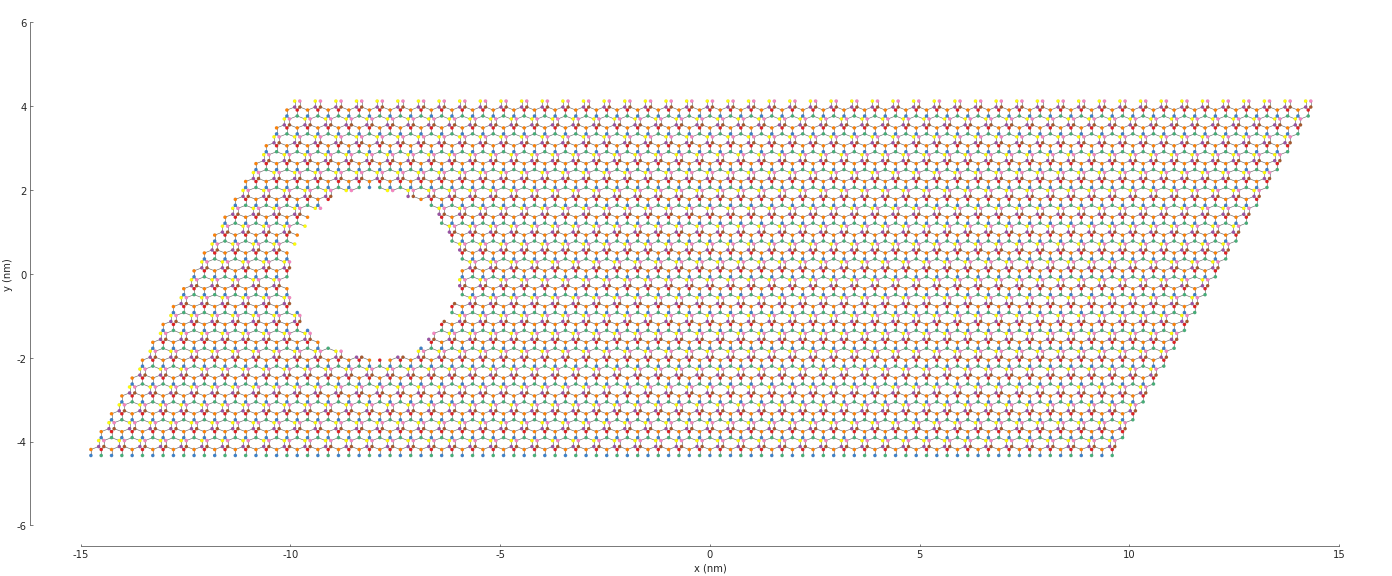

In [18]:
#move -8nm
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[-8, 0], radius=2)
)
plt.figure(figsize=(40,10))
model.plot(num_periods=0)

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


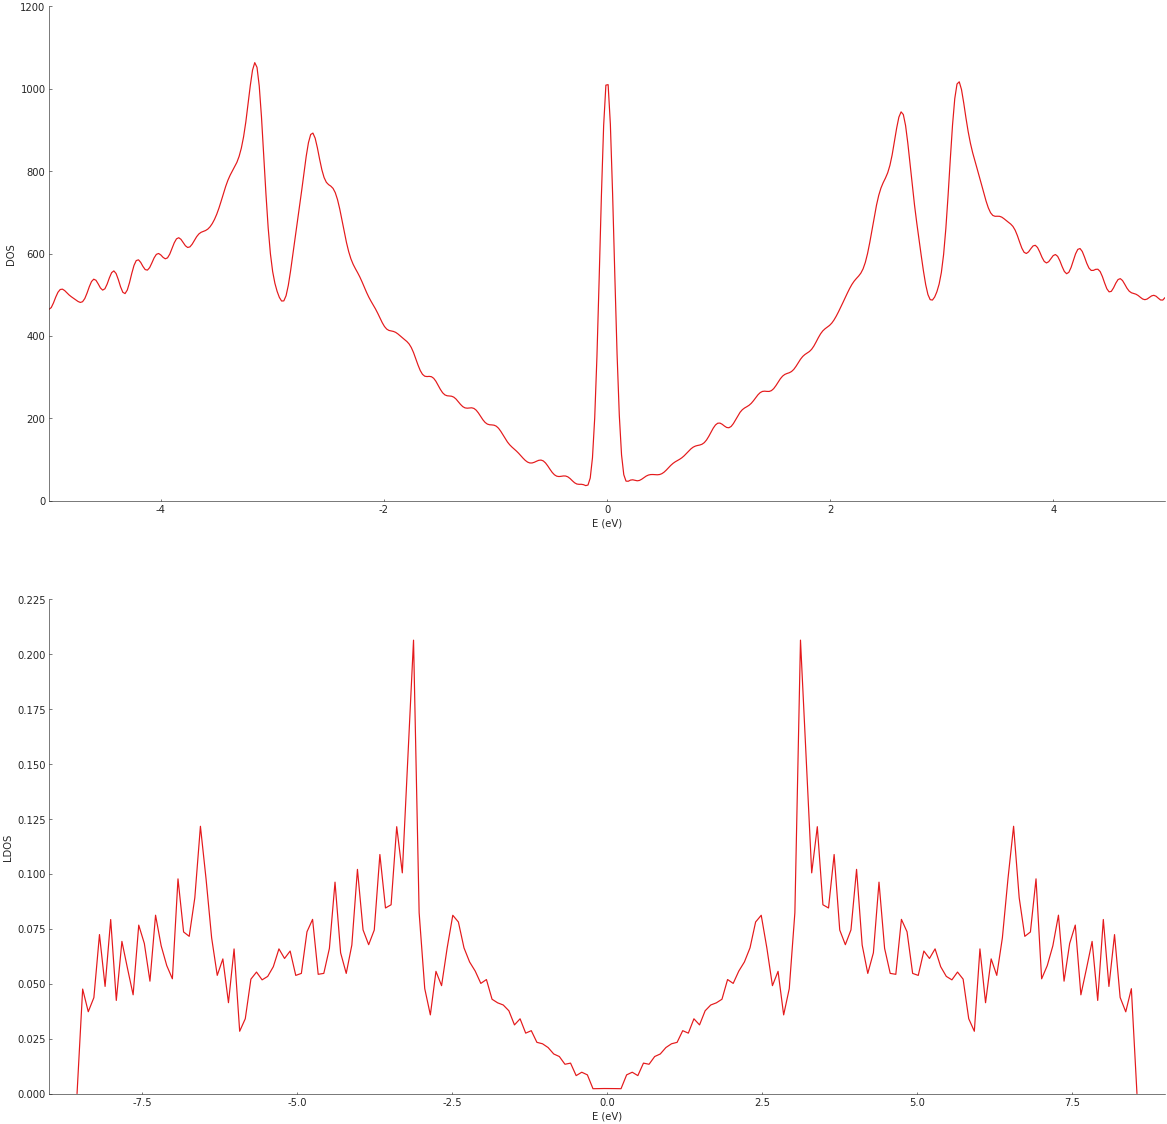

In [19]:
#move vacancy -8nm

model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[-8, 0], radius=2)
)
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-5, 5, 500), broadening=0.06, num_random=16)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.figure(figsize=[20,20])
plt.subplot(211)
dos.plot()
plt.subplot(212)
ldos.plot()

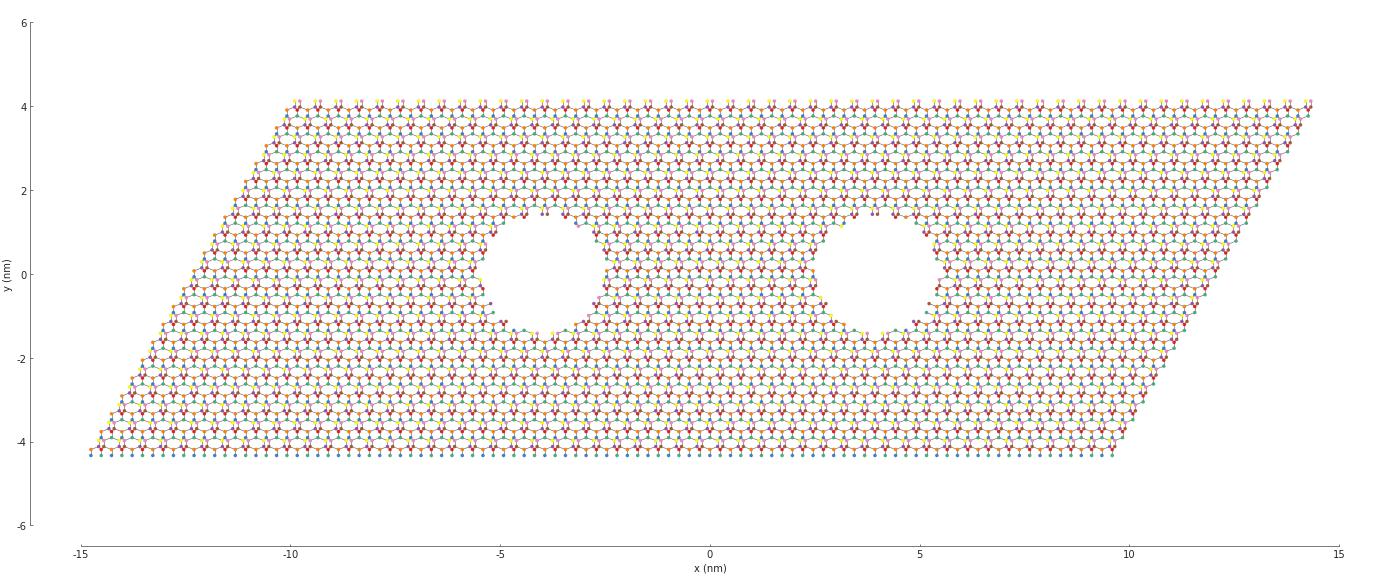

In [20]:
#two vacancy on star2 graphene

model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
       vacancy(position=[-4, 0], radius=sqrt(2)),
    vacancy(position=[4, 0], radius=sqrt(2))
)
plt.figure(figsize=(40,10))
model.plot(num_periods=0)

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


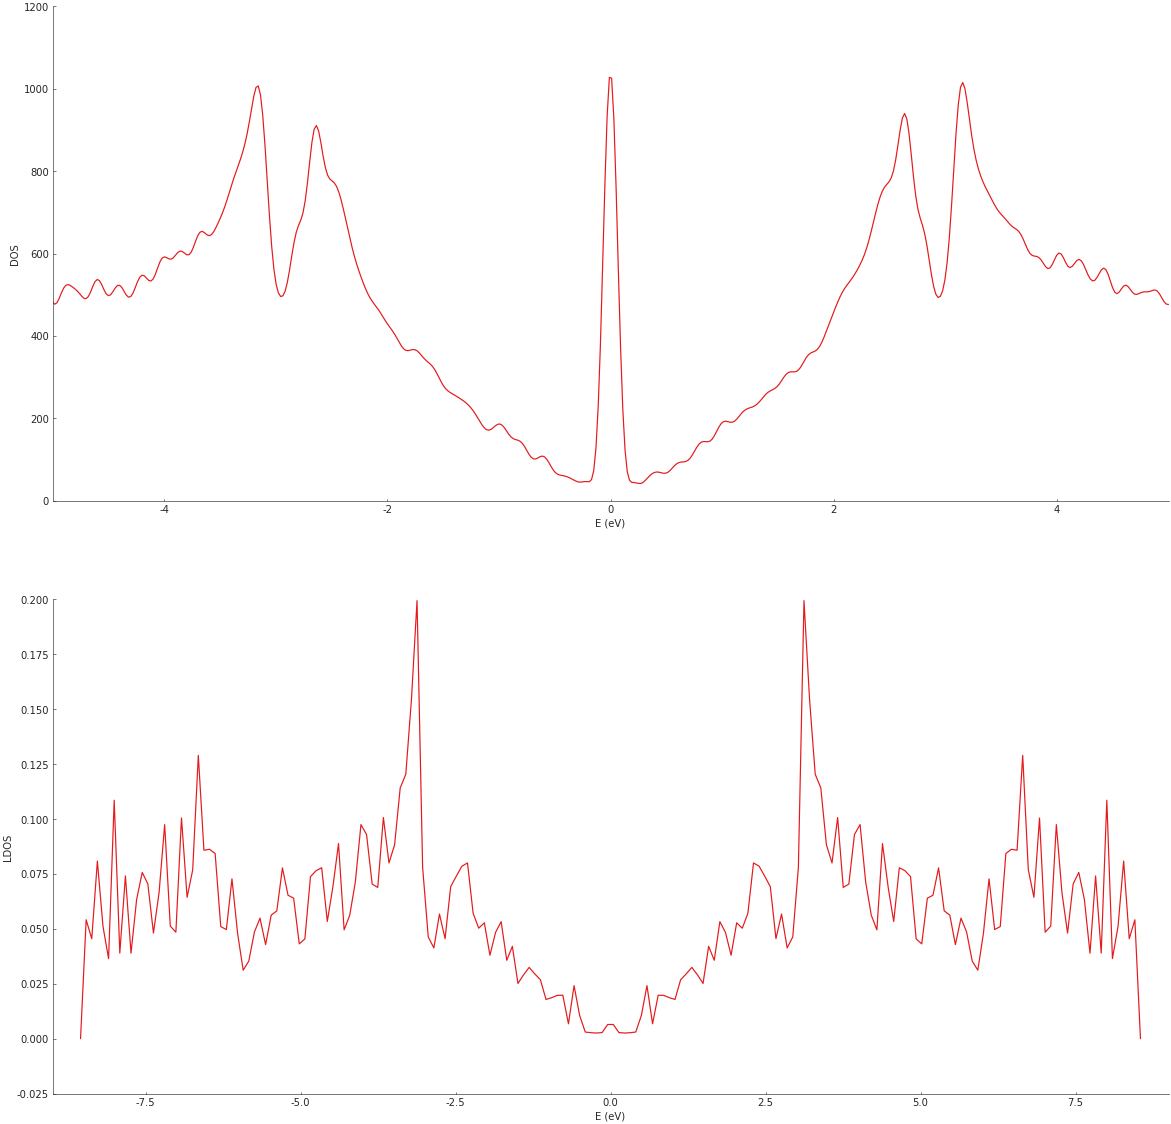

In [21]:
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[-4, 0], radius=sqrt(2)),
    vacancy(position=[4, 0], radius=sqrt(2))
    
)
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-5, 5, 500), broadening=0.06, num_random=16)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.figure(figsize=[20,20])
plt.subplot(211)
dos.plot()
plt.subplot(212)
ldos.plot()

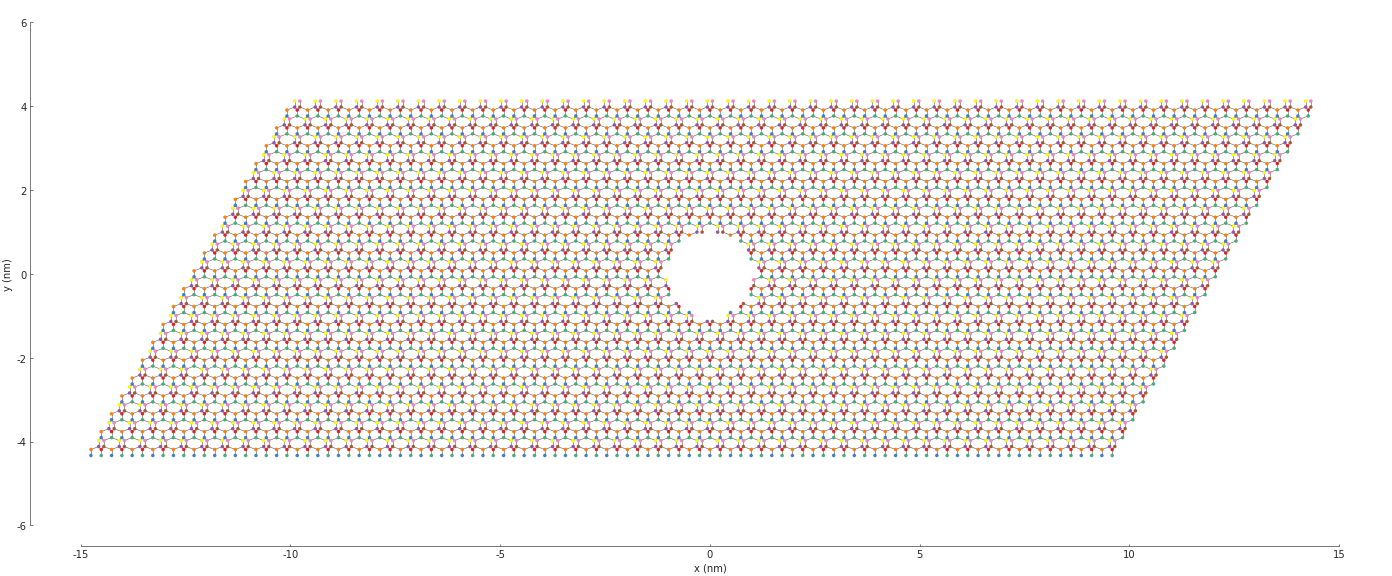

In [22]:
#vacancy to star2 graphene
#radius=1

model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[0, 0], radius=1)
)
plt.figure(figsize=(40,10))
model.plot(num_periods=0)

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


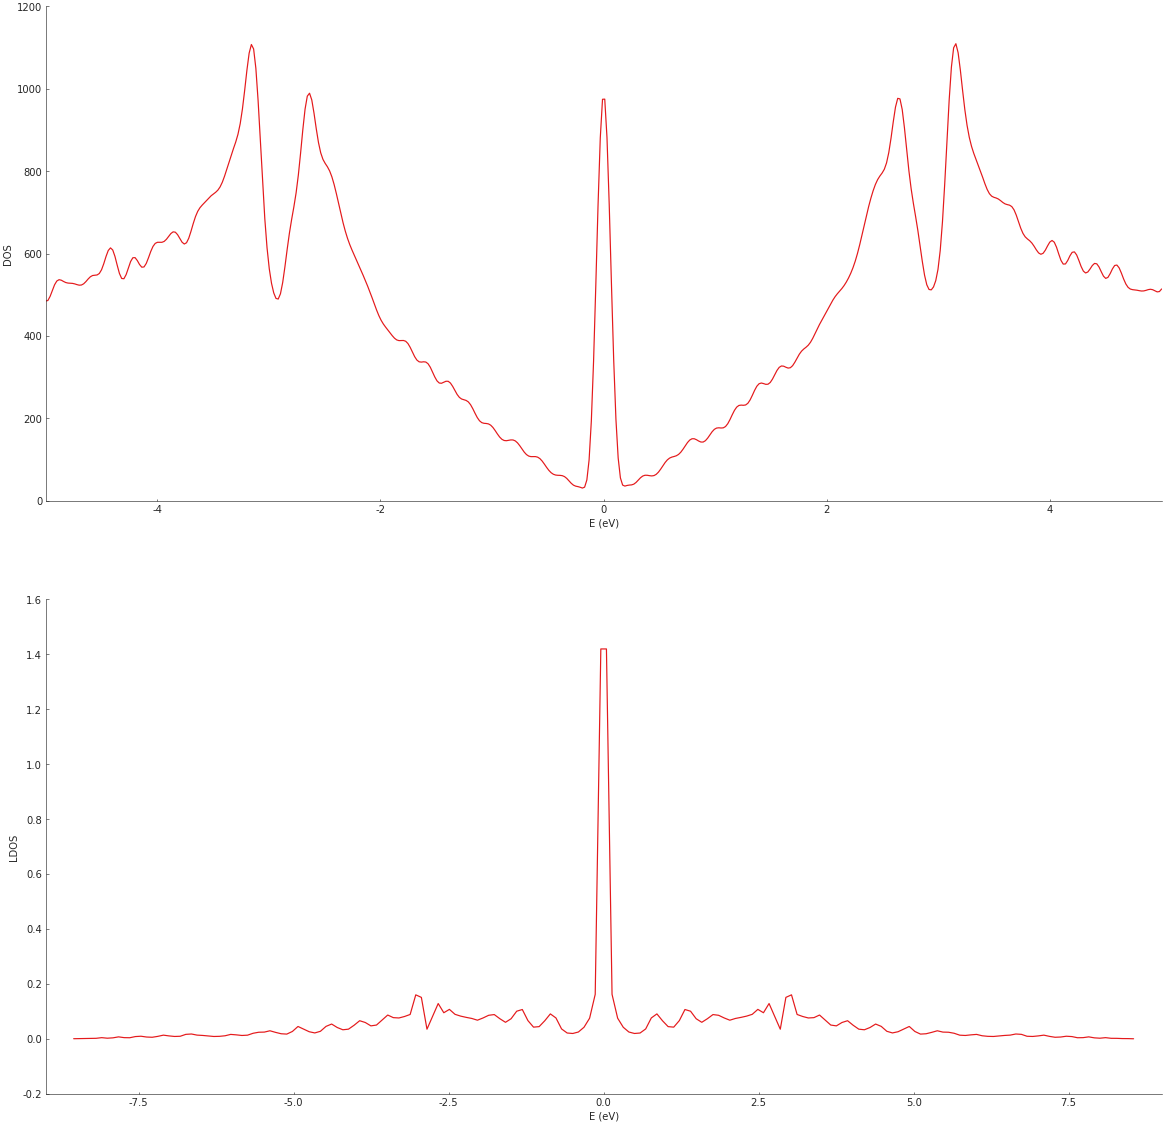

In [23]:
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[0, 0], radius=1)
)
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-5, 5, 500), broadening=0.06, num_random=16)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.figure(figsize=[20,20])
plt.subplot(211)
dos.plot()
plt.subplot(212)
ldos.plot()

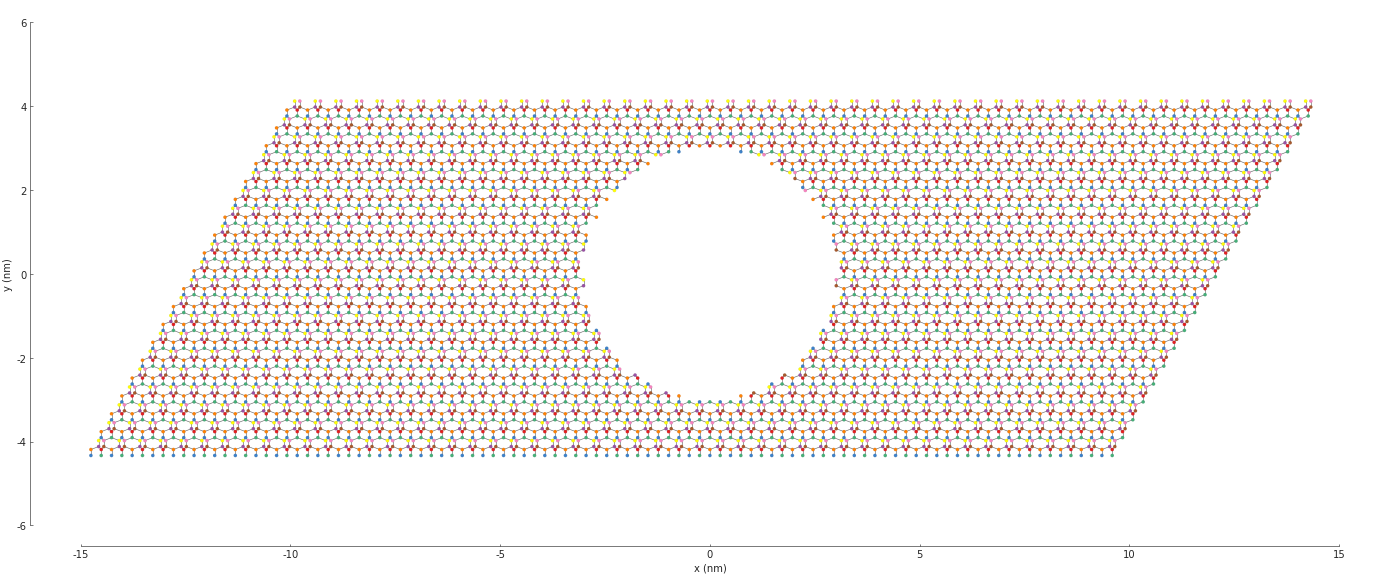

In [24]:
#vacancy to star2 graphene
#radius=3

model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[0, 0], radius=3)
)
plt.figure(figsize=(40,10))
model.plot(num_periods=0)

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


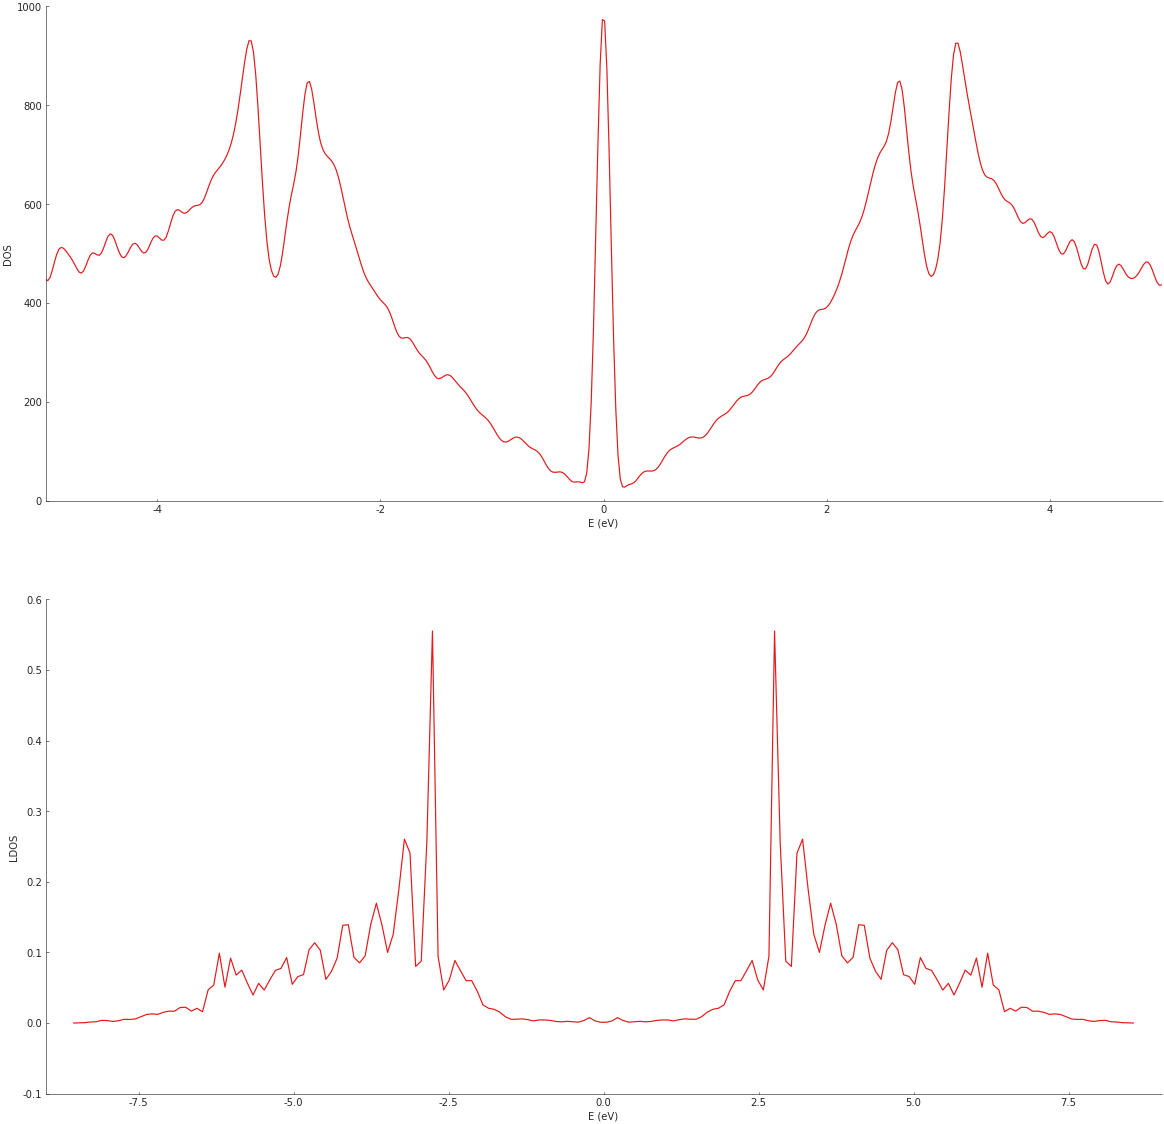

In [29]:
model = pb.Model(
    monolayer_graphene(),
    pb.primitive(a1=50, a2=20),
    pb.translational_symmetry(a1=50, a2=20),
    vacancy(position=[0, 0], radius=3)
)
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-5, 5, 500), broadening=0.06, num_random=16)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.figure(figsize=[20,20])
plt.subplot(211)
dos.plot()
plt.subplot(212)
ldos.plot()